In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [4]:
df.shape

(768, 9)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
df.isnull().sum()
X = df.drop('Outcome', axis=1)

In [11]:
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
imputer = SimpleImputer(missing_values=0, strategy='median')
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, df['Outcome'], test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
model = LinearRegression()
model.fit(X_train , y_train)

LinearRegression()

In [34]:
y_pred_prob = model.predict(X_test)

In [35]:
threshold = 0.5
y_pred = (y_pred_prob >= threshold).astype(int)

In [36]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[125  26]
 [ 33  47]]


In [37]:
classification_report_result = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report_result)

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       151
           1       0.64      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.72      0.71      0.71       231
weighted avg       0.74      0.74      0.74       231



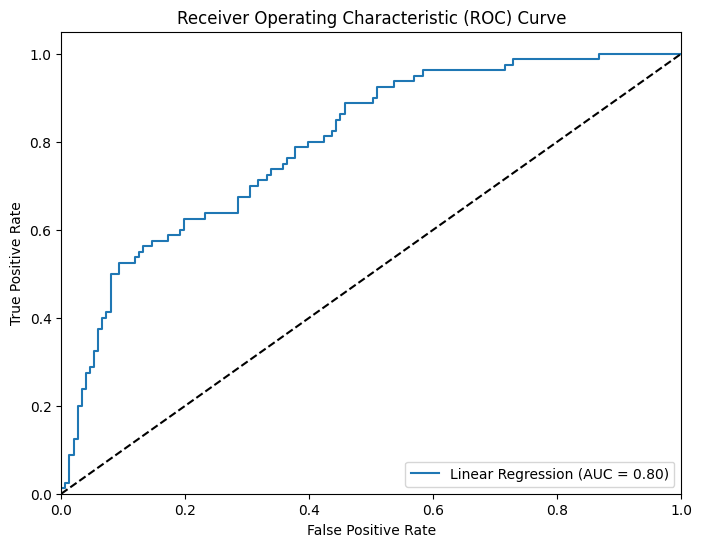

In [38]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Linear Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [21]:
predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Predicted Probability': y_pred_prob
})
print(predictions_df.head(10))

     Actual  Predicted  Predicted Probability
668       0          0               0.335500
324       0          0               0.238099
624       0          0               0.151052
690       0          0               0.240136
473       0          0               0.481424
204       0          0               0.452574
97        0          0              -0.174505
336       0          1               0.606623
568       0          1               0.524178
148       0          1               0.704770


In [23]:
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
imputer = SimpleImputer(missing_values=0, strategy='median')
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
y_pred_prob = knn.predict_proba(X_test)[:, 1]

predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Predicted Probability': y_pred_prob
})

print(predictions_df.head(10))

     Actual  Predicted  Predicted Probability
668       0          1                    0.8
324       0          0                    0.4
624       0          0                    0.0
690       0          1                    0.8
473       0          1                    0.8
204       0          1                    0.6
97        0          0                    0.0
336       0          0                    0.4
568       0          1                    0.6
148       0          0                    0.2


In [24]:
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)    

Confusion Matrix:
[[112  39]
 [ 29  51]]


In [25]:
classification_report_result = classification_report(y_test, y_pred)
print("Classification Report:")
print(classification_report_result)

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.74      0.77       151
           1       0.57      0.64      0.60        80

    accuracy                           0.71       231
   macro avg       0.68      0.69      0.68       231
weighted avg       0.72      0.71      0.71       231



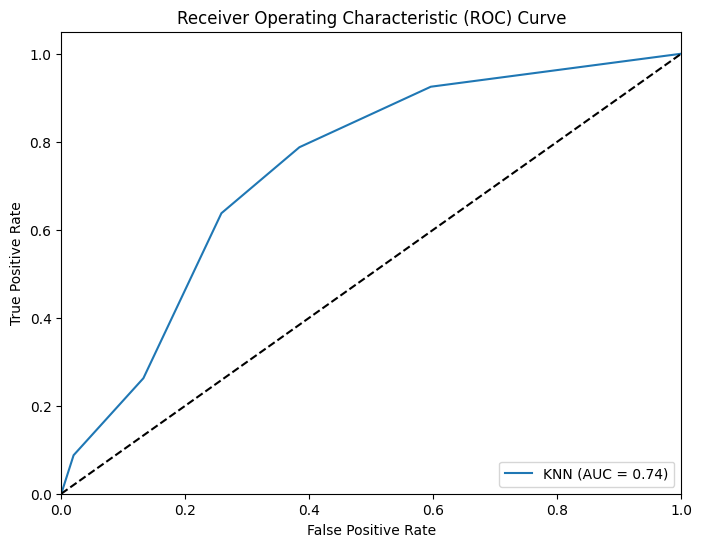

In [29]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'KNN (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [40]:
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
imputer = SimpleImputer(missing_values=0, strategy='median')
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

X = df.drop('Outcome', axis=1)
y = df['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred_prob = model.predict_proba(X_test)[:, 1]

predictions_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Predicted Probability': y_pred_prob
})

print(predictions_df.head(10))

     Actual  Predicted  Predicted Probability
668       0          0               0.256436
324       0          0               0.181823
624       0          0               0.109299
690       0          0               0.128379
473       0          0               0.485966
204       0          0               0.439152
97        0          0               0.010825
336       0          0               0.350186
568       0          1               0.594716
148       0          1               0.776520


Confusion Matrix:
[[124  27]
 [ 33  47]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       151
           1       0.64      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



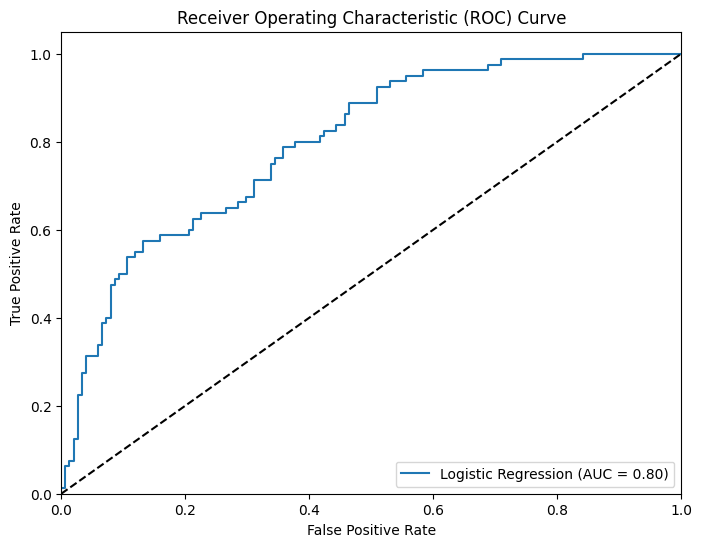

In [41]:
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [44]:
columns_to_impute = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
imputer = SimpleImputer(missing_values=0, strategy='median')
df[columns_to_impute] = imputer.fit_transform(df[columns_to_impute])

# Split the dataset into features (X) and target variable (y)
X = df.drop('Outcome', axis=1)
y = df['Outcome']

# Split the data into training (70%) and testing (30%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)  
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_pred_prob_knn = knn.predict_proba(X_test)[:, 1]
print("KNN Classification Report:")
print(classification_report(y_test, y_pred_knn))
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_prob_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

KNN Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.74      0.77       151
           1       0.57      0.64      0.60        80

    accuracy                           0.71       231
   macro avg       0.68      0.69      0.68       231
weighted avg       0.72      0.71      0.71       231



In [46]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)
y_pred_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]
print("Logistic Regression Classification Report:")
print(classification_report(y_test, y_pred_log_reg))
fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_pred_prob_log_reg)
roc_auc_log_reg = auc(fpr_log_reg, tpr_log_reg)

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.82      0.81       151
           1       0.64      0.59      0.61        80

    accuracy                           0.74       231
   macro avg       0.71      0.70      0.71       231
weighted avg       0.74      0.74      0.74       231



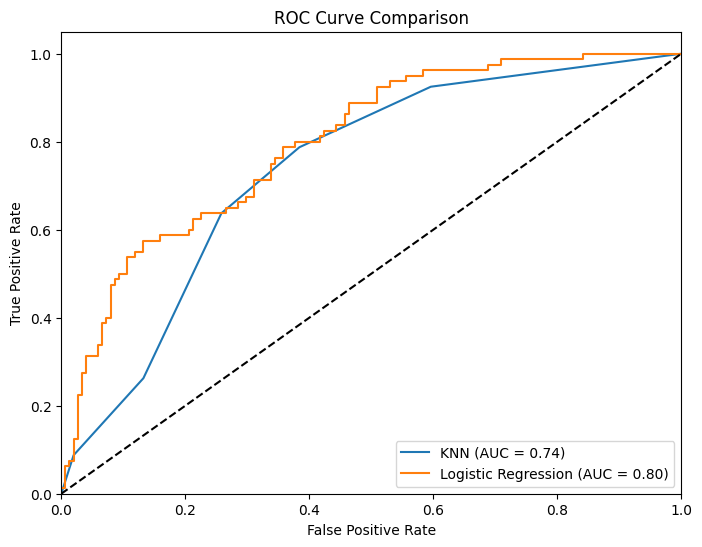

In [47]:
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label=f'KNN (AUC = {roc_auc_knn:.2f})')
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression (AUC = {roc_auc_log_reg:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.show()

In [48]:
predictions_df_knn = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred_knn,
    'Predicted Probability': y_pred_prob_knn
})

print(predictions_df_knn.head(10))

     Actual  Predicted  Predicted Probability
668       0          1                    0.8
324       0          0                    0.4
624       0          0                    0.0
690       0          1                    0.8
473       0          1                    0.8
204       0          1                    0.6
97        0          0                    0.0
336       0          0                    0.4
568       0          1                    0.6
148       0          0                    0.2
